# **GRIP SPARK FOUNDATION**

## TASK 6 - Stock Market Prediction using Numerical and Textual Analysis
###Objective: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.
####Apurva Pingale


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import seaborn as sns

In [2]:
import matplotlib as mpl
from matplotlib import style

#Adjusting the size of matplotlib
mpl.rc('figure', figsize = (15 , 15))
mpl.__version__

#Adjusting the style of matplotlib
style.use('ggplot')

In [3]:
!pip install pandas-datareader

In [4]:
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

In [5]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 11)

In [6]:
df = web.DataReader("AAPL", 'yahoo', start, end)

In [7]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.572422
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.583784
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.479061
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.467082
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.510078


# Rolling Mean (Moving Average) 
#### To determine trend
The Moving Average makes the line smooth and showcase the increasing or decreasing trend of stocks price.

In [8]:
close_px = df['Adj Close']
mavg = close_px.rolling(window = 100).mean()
mavg.head(10)

Date
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
2010-01-11   NaN
2010-01-12   NaN
2010-01-13   NaN
2010-01-14   NaN
2010-01-15   NaN
Name: Adj Close, dtype: float64

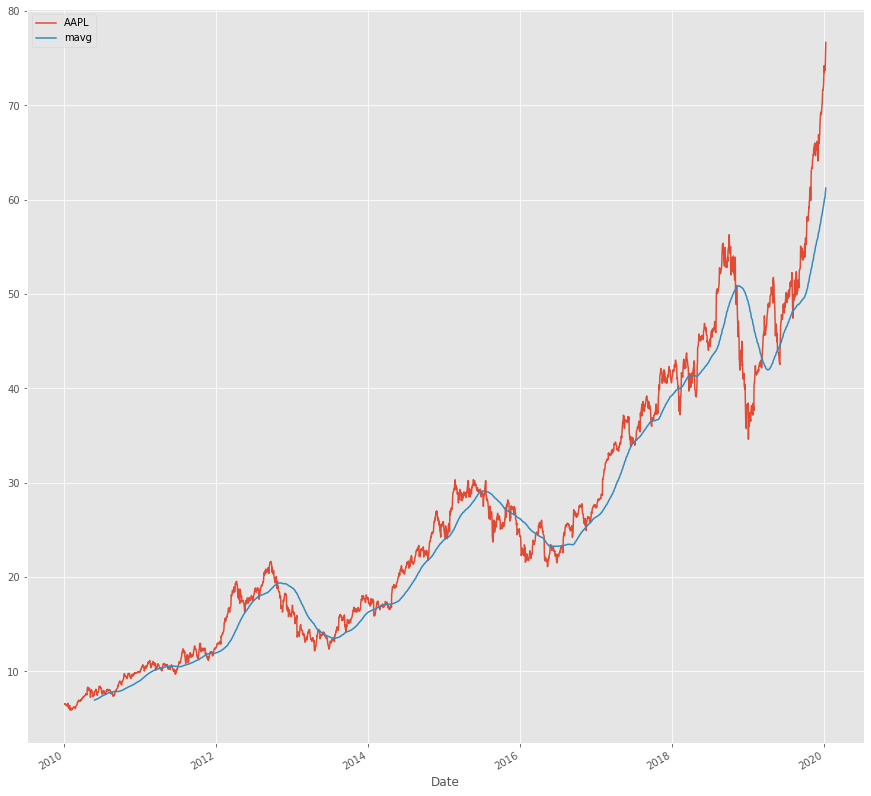

In [9]:
close_px.plot(label = 'AAPL')
mavg.plot(label = 'mavg')
plt.legend()
plt.show()

##### In this chart, the Moving Average showcases increasing trend the upturn or downturn of stocks price. Logically, you should buy when the stocks are experiencing downturn and sell when the stock and experiencing upturn.

### Return Deviation
#### To determine risk and return

##### Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment - investopedia

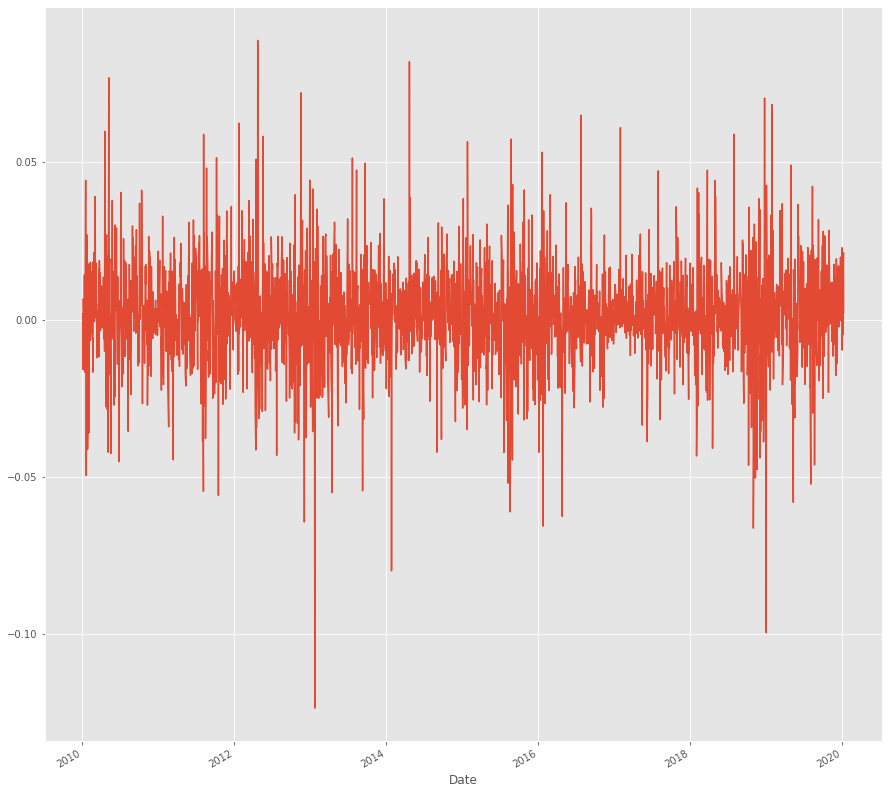

In [10]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label = 'return')
plt.show()

##### logically, our ideal stocks should return as high and stable as possible. if you are risk averse, you might want to avoid this stocks as you saw the 10% drop in 2013. This decision is heavily subjected to your general sentiment of stocks and competitor analysis.

## Analysis Competitors Stocks

In this segment , we are going to analyse on how one company performs in relative with its competitors. Let'sassume we are intrested in technology companies and want to compare the big guns: Apple, GE, Google, IBM, and Microsoft.

In [11]:
df.comp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'], 'yahoo', start = start, end = end)['Adj Close']
df.comp.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2010-01-04,6.572422,10.993693,312.204773,91.506264,23.994564
2010-01-05,6.583784,11.050618,310.829926,90.400902,24.002319
2010-01-06,6.479061,10.993693,302.994293,89.813629,23.855013
2010-01-07,6.467082,11.562950,295.940735,89.502716,23.606922
2010-01-08,6.510078,11.811997,299.885956,90.400902,23.769743
2010-01-11,6.452650,11.925844,299.432648,89.454376,23.467388
2010-01-12,6.379251,11.932961,294.137512,90.165970,23.312330
2010-01-13,6.469232,11.975655,292.448822,89.972527,23.529409
2010-01-14,6.431766,11.883149,293.823669,91.409561,24.002319


# Correlation Analysis
#### Does one competitor afeect others?

We can analyse the competition by running the percentage change and correlation function in pandas. Percentage change will find how the price changes compared to the previous day which defines returns. Knowing the correlation will help us see whether the returns are affected by other stocks returns

In [12]:
retscomp = df.comp.pct_change()
corr = retscomp.corr()
retscomp.head(10)

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.005178,-0.004404,-0.012080,0.000323
2010-01-06,-0.015906,-0.005151,-0.025209,-0.006496,-0.006137
2010-01-07,-0.001849,0.051780,-0.023280,-0.003462,-0.010400
2010-01-08,0.006648,0.021538,0.013331,0.010035,0.006897
2010-01-11,-0.008821,0.009638,-0.001512,-0.010470,-0.012720
2010-01-12,-0.011375,0.000597,-0.017684,0.007955,-0.006607
2010-01-13,0.014105,0.003578,-0.005741,-0.002145,0.009312
2010-01-14,-0.005791,-0.007724,0.004701,0.015972,0.020099


To prove the positive correlations, we will use heat map to visualize the correlation ranges among the competing stocks. Notice that the lighter the color, the more correlated the two stocks are.

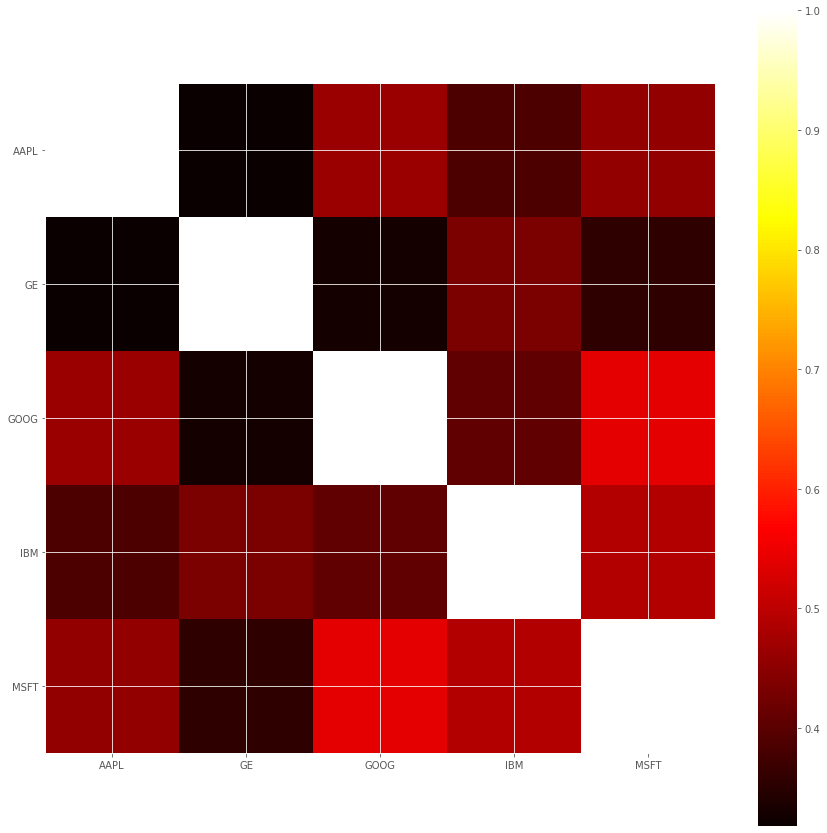

In [13]:
plt.imshow(corr, cmap = 'hot', interpolation = 'none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

From the scatter matrix and heatmap, we can find great correlations among the competing stocks.However, this might not show causally, and could just show the trend in the technology industry rather than show how competing stocks affect each other.

## Stocks Return Rate and Risk

Apart from correlation, we also analyse each stock's risks and returns. In this case we are extracting the average of returns (Return Rate) and the standard deviation of raturns (Risk)

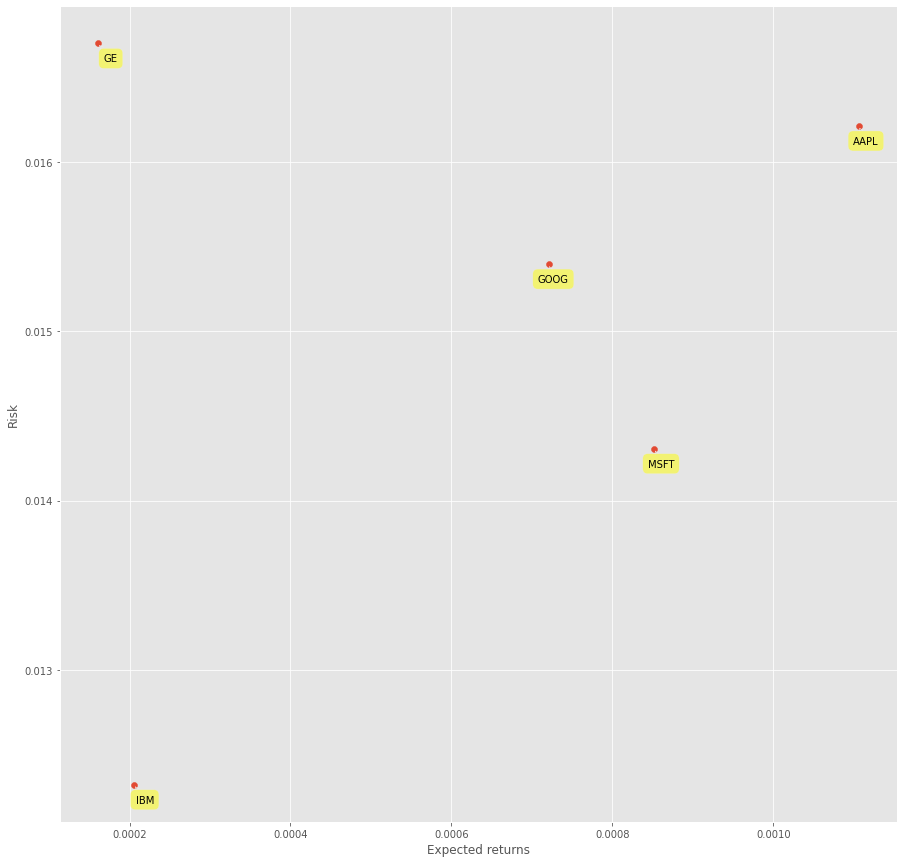

In [14]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(label, xy = (x , y), xytext = (20 , -20), textcoords = 'offset points',
                 ha = 'right', va = 'bottom', bbox = dict(boxstyle = 'round, pad = 0.5', fc = 'yellow',
                 alpha = 0.5), arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = 0'))